Import

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

with out feature selection

TomekLinks undersimpling 


Training Accuracy score: 0.8903005887821506
Testing Accuracy score: 0.8823985125503564
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      2296
           1       0.90      0.93      0.91      4158

    accuracy                           0.88      6454
   macro avg       0.88      0.87      0.87      6454
weighted avg       0.88      0.88      0.88      6454



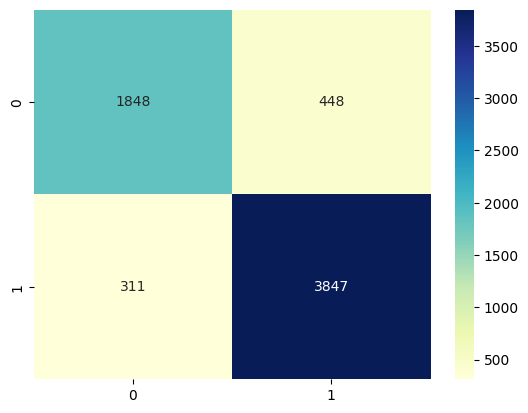

In [3]:
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/cleandata.csv')
tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)
pipe = Pipeline([('gradientBoost', GradientBoostingClassifier())])
pipe.fit(x_train,y_train)

y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm
                        )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


random undersimpling

Accuracy: 82.07%

Training Accuracy score: 0.8423863636363637
Testing Accuracy score: 0.8206818181818182
DecisionTreeClassifier score: 0.8423863636363637
classification_report 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      2200
           1       0.82      0.83      0.82      2200

    accuracy                           0.82      4400
   macro avg       0.82      0.82      0.82      4400
weighted avg       0.82      0.82      0.82      4400



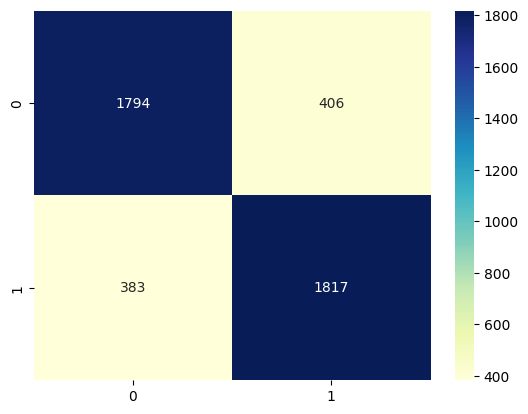

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
data1 = pd.read_csv('./Data/cleandata.csv')
df1=data1[data1.account_type== 1].head(1195)
df2=data1[data1.account_type== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf', GradientBoostingClassifier()) # Training a random forest classifier on the data
])

pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("DecisionTreeClassifier score:",pipeline.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

with StandardScaler et dimensionality reduction techniques.

Accuracy: 82.07%

Training Accuracy score: 0.8423863636363637
Testing Accuracy score: 0.8206818181818182
DecisionTreeClassifier score: 0.8423863636363637
classification_report 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      2200
           1       0.82      0.83      0.82      2200

    accuracy                           0.82      4400
   macro avg       0.82      0.82      0.82      4400
weighted avg       0.82      0.82      0.82      4400



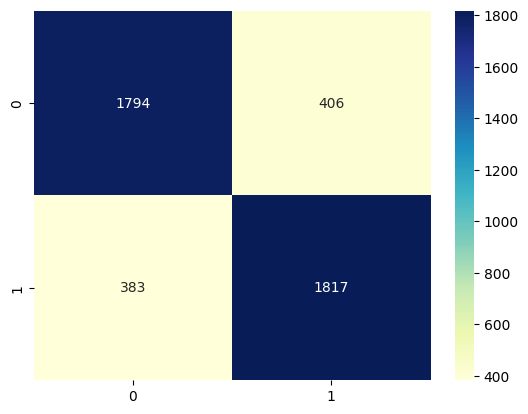

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
data1 = pd.read_csv('./Data/cleandata.csv')
df1=data1[data1.account_type== 1].head(1195)
df2=data1[data1.account_type== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)

x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf', GradientBoostingClassifier()) # Training a random forest classifier on the data
])

pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("DecisionTreeClassifier score:",pipeline.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

oversimpling

Accuracy: 87.57%

 Training Accuracy score: 0.8803088803088803
Testing Accuracy score: 0.8756804799466726
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4501
           1       0.87      0.88      0.88      4500

    accuracy                           0.88      9001
   macro avg       0.88      0.88      0.88      9001
weighted avg       0.88      0.88      0.88      9001



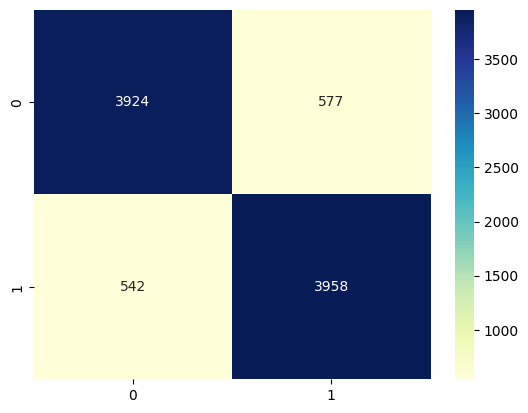

In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/cleandata.csv')

x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', GradientBoostingClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
# feat_importances = pd.Series(pipeline['rf'].feature_importances_, index=x.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# with feature selection

oversimpling

Accuracy: 87.03%

 Training Accuracy score: 0.8773922946584817
Testing Accuracy score: 0.8703477391400956
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4501
           1       0.86      0.88      0.87      4500

    accuracy                           0.87      9001
   macro avg       0.87      0.87      0.87      9001
weighted avg       0.87      0.87      0.87      9001



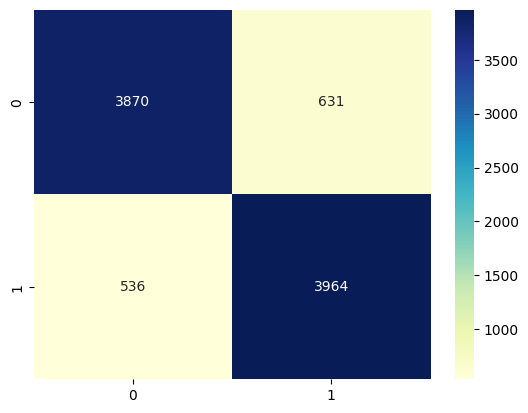

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
# verified  location tweet_language url avg_tweets_by_hour_of_day following/years followers/lastpost 
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'IsABot']]



from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', GradientBoostingClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

random undersimpling

Accuracy: 93.23%

 Training Accuracy score: 0.9380681818181819
Testing Accuracy score: 0.9322727272727273
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      2200
           1       0.90      0.97      0.93      2200

    accuracy                           0.93      4400
   macro avg       0.93      0.93      0.93      4400
weighted avg       0.93      0.93      0.93      4400



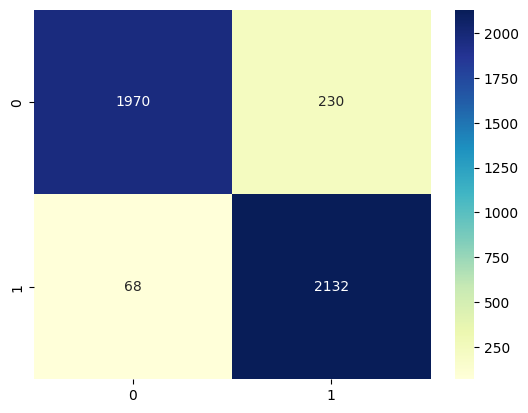

In [3]:
df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', GradientBoostingClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# hyperparametre


In [4]:
from sklearn.model_selection import GridSearchCV
data1 = pd.read_csv('./Data/cleandata.csv')
# verified  location tweet_language url avg_tweets_by_hour_of_day following/years followers/lastpost 
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]

x=data1.iloc[:, :-1]
y = data1.IsABot.values.tolist()

# Creating lists of parameter for GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid=param_grid, cv = 3)

# Fitting the grid search
clf_GS.fit(x, y)

clf_GS.best_params_

#  cross validation

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]
from sklearn.model_selection import KFold, cross_val_score
df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
k_folds = KFold(n_splits = 10)
clf=GradientBoostingClassifier()
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())
# Average CV Score:  0.7085454545454545

Average CV Score:  0.7085454545454545
